In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=94e7b353bdf19d764395debf3da32f81b7c25347350b089faeaff955ee6e7f6a
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


#Se importan librerias

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings

# Desactivar la advertencia FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

#Se crea la sesion Spark

In [4]:
from pyspark.sql import SparkSession, SQLContext

In [5]:
spark = SparkSession.builder.master("local[1]").appName("Proyecto6").getOrCreate()

In [6]:
spark

In [7]:
sc = spark.sparkContext
sc

<SparkContext master=local[1] appName=Proyecto6>

#Exploración del DataFrame

In [8]:
pyspark_df = spark.read.csv(path="/content/WA_Fn-UseC_-Telco-Customer-Churn.csv", inferSchema= True, header = True)

In [ ]:
pyspark_df.show(5)

+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+--------------+------------+-----+
|7590-VHVEG|Female|            0|    Yes|        No|     1|          No|No phone service|            DSL|            No|         Yes|              No|         No|    

In [ ]:
pyspark_df.printSchema()

root
 |-- customerID: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- SeniorCitizen: integer (nullable = true)
 |-- Partner: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- tenure: integer (nullable = true)
 |-- PhoneService: string (nullable = true)
 |-- MultipleLines: string (nullable = true)
 |-- InternetService: string (nullable = true)
 |-- OnlineSecurity: string (nullable = true)
 |-- OnlineBackup: string (nullable = true)
 |-- DeviceProtection: string (nullable = true)
 |-- TechSupport: string (nullable = true)
 |-- StreamingTV: string (nullable = true)
 |-- StreamingMovies: string (nullable = true)
 |-- Contract: string (nullable = true)
 |-- PaperlessBilling: string (nullable = true)
 |-- PaymentMethod: string (nullable = true)
 |-- MonthlyCharges: double (nullable = true)
 |-- TotalCharges: string (nullable = true)
 |-- Churn: string (nullable = true)



In [ ]:
pyspark_df.describe().show()

+-------+----------+------+------------------+-------+----------+------------------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+------------------+------------------+-----+-------------------+
|summary|customerID|gender|     SeniorCitizen|Partner|Dependents|            tenure|PhoneService|MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|    MonthlyCharges|      TotalCharges|Churn|Clean_Total_Charges|
+-------+----------+------+------------------+-------+----------+------------------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+------------------+------------------+-----+-------------------+
|  count| 

In [ ]:
pyspark_df.dtypes

[('customerID', 'string'),
 ('gender', 'string'),
 ('SeniorCitizen', 'int'),
 ('Partner', 'string'),
 ('Dependents', 'string'),
 ('tenure', 'int'),
 ('PhoneService', 'string'),
 ('MultipleLines', 'string'),
 ('InternetService', 'string'),
 ('OnlineSecurity', 'string'),
 ('OnlineBackup', 'string'),
 ('DeviceProtection', 'string'),
 ('TechSupport', 'string'),
 ('StreamingTV', 'string'),
 ('StreamingMovies', 'string'),
 ('Contract', 'string'),
 ('PaperlessBilling', 'string'),
 ('PaymentMethod', 'string'),
 ('MonthlyCharges', 'double'),
 ('TotalCharges', 'string'),
 ('Churn', 'string')]

#Limpieza de datos

##Valores nulos

In [10]:
from pyspark.sql.functions import col

In [11]:
import pyspark.sql.functions as F

In [ ]:
pyspark_df.select([ F.count( F.when(F.col(c).isNull(),c )  ).alias(c) for c in pyspark_df.columns  ]).show()

+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|Contract|PaperlessBilling|PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+
|         0|     0|            0|      0|         0|     0|           0|            0|              0|             0|           0|               0|          0|          0|              0|       0|               0| 

In [ ]:
pyspark_df.select([ F.count( F.when(F.col(c) == " ",c )  ).alias(c) for c in pyspark_df.columns  ]).show()

+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|Contract|PaperlessBilling|PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+
|         0|     0|            0|      0|         0|     0|           0|            0|              0|             0|           0|               0|          0|          0|              0|       0|               0| 

##Tratar los valores nulos

In [ ]:
pyspark_df.groupBy('TotalCharges').count().orderBy('count', ascending = False).show(5)

+------------+-----+
|TotalCharges|count|
+------------+-----+
|        20.2|   11|
|            |   11|
|       19.75|    9|
|        19.9|    8|
|       20.05|    8|
+------------+-----+
only showing top 5 rows



In [12]:
mean = pyspark_df.select( F.mean(pyspark_df["TotalCharges"] ) ).collect()[0][0]

In [13]:
from pyspark.sql.types import FloatType

In [14]:
pyspark_df = pyspark_df.withColumn('Clean_Total_Charges', F.when(pyspark_df.TotalCharges == " ",
round(mean, 2)).otherwise(pyspark_df.TotalCharges).cast(FloatType()))

In [ ]:
pyspark_df.groupby("Clean_Total_Charges").count().orderBy("count", ascending = False).show(5)

+-------------------+-----+
|Clean_Total_Charges|count|
+-------------------+-----+
|             2283.3|   12|
|               20.2|   11|
|              19.75|    9|
|              19.65|    8|
|              20.05|    8|
+-------------------+-----+
only showing top 5 rows



In [ ]:
pyspark_df.dtypes

[('customerID', 'string'),
 ('gender', 'string'),
 ('SeniorCitizen', 'int'),
 ('Partner', 'string'),
 ('Dependents', 'string'),
 ('tenure', 'int'),
 ('PhoneService', 'string'),
 ('MultipleLines', 'string'),
 ('InternetService', 'string'),
 ('OnlineSecurity', 'string'),
 ('OnlineBackup', 'string'),
 ('DeviceProtection', 'string'),
 ('TechSupport', 'string'),
 ('StreamingTV', 'string'),
 ('StreamingMovies', 'string'),
 ('Contract', 'string'),
 ('PaperlessBilling', 'string'),
 ('PaymentMethod', 'string'),
 ('MonthlyCharges', 'double'),
 ('TotalCharges', 'string'),
 ('Churn', 'string'),
 ('Clean_Total_Charges', 'float')]

#Análisis exploratorio de datos

##Variables categóricas

In [ ]:
pyspark_df.show(5)

+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+--------------+------------+-----+-------------------+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|MonthlyCharges|TotalCharges|Churn|Clean_Total_Charges|
+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+--------------+------------+-----+-------------------+
|7590-VHVEG|Female|            0|    Yes|        No|     1|          No|No phone service|            DSL| 

In [ ]:
pyspark_df.groupBy("customerID").count().orderBy("count", ascending = False).show(5)

+----------+-----+
|customerID|count|
+----------+-----+
|3668-QPYBK|    1|
|6234-RAAPL|    1|
|1894-IGFSG|    1|
|6982-SSHFK|    1|
|5859-HZYLF|    1|
+----------+-----+
only showing top 5 rows



No se repiten los clientes

In [15]:
V_categoricas = ['gender', 'Partner', 'Dependents', 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [ ]:
for i in V_categoricas:
  pyspark_df.groupBy(i).count().show()


+------+-----+
|gender|count|
+------+-----+
|Female| 3488|
|  Male| 3555|
+------+-----+

+-------+-----+
|Partner|count|
+-------+-----+
|     No| 3641|
|    Yes| 3402|
+-------+-----+

+----------+-----+
|Dependents|count|
+----------+-----+
|        No| 4933|
|       Yes| 2110|
+----------+-----+

+------------+-----+
|PhoneService|count|
+------------+-----+
|          No|  682|
|         Yes| 6361|
+------------+-----+

+----------------+-----+
|   MultipleLines|count|
+----------------+-----+
|No phone service|  682|
|              No| 3390|
|             Yes| 2971|
+----------------+-----+

+---------------+-----+
|InternetService|count|
+---------------+-----+
|    Fiber optic| 3096|
|             No| 1526|
|            DSL| 2421|
+---------------+-----+

+-------------------+-----+
|     OnlineSecurity|count|
+-------------------+-----+
|                 No| 3498|
|                Yes| 2019|
|No internet service| 1526|
+-------------------+-----+

+-------------------+-----+


Con las tablas anteriores vemos que existen clases desbalanceadas.

In [ ]:
#Obtener la moda de una columna categórica
pyspark_df.groupby("gender").count().orderBy("count", ascending = False).first()[0]

'Male'

In [ ]:
pyspark_df.select('MonthlyCharges', "Churn").groupBy("Churn").agg( F.avg('MonthlyCharges').alias("Promedio de MonthlyCharges") ).show()

+-----+--------------------------+
|Churn|Promedio de MonthlyCharges|
+-----+--------------------------+
|   No|          61.2651236953999|
|  Yes|          74.4413322632423|
+-----+--------------------------+



Promedio de MonthlyCharges para cada clase de la variable objetivo

In [ ]:
pyspark_df.select("gender", "Churn").groupBy("Churn", "gender").count().show()

+-----+------+-----+
|Churn|gender|count|
+-----+------+-----+
|   No|Female| 2549|
|   No|  Male| 2625|
|  Yes|  Male|  930|
|  Yes|Female|  939|
+-----+------+-----+



Distribución de la variable objetivo y el género

##Variables numéricas

In [ ]:
pyspark_df.select(["SeniorCitizen", "tenure", "MonthlyCharges", "Clean_Total_Charges"]).describe().show()

+-------+------------------+------------------+------------------+-------------------+
|summary|     SeniorCitizen|            tenure|    MonthlyCharges|Clean_Total_Charges|
+-------+------------------+------------------+------------------+-------------------+
|  count|              7043|              7043|              7043|               7043|
|   mean|0.1621468124378816| 32.37114865824223| 64.76169246059922| 2283.3004407724266|
| stddev|0.3686116056100135|24.559481023094442|30.090047097678482|  2265.000259026857|
|    min|                 0|                 0|             18.25|               18.8|
|    max|                 1|                72|            118.75|             8684.8|
+-------+------------------+------------------+------------------+-------------------+



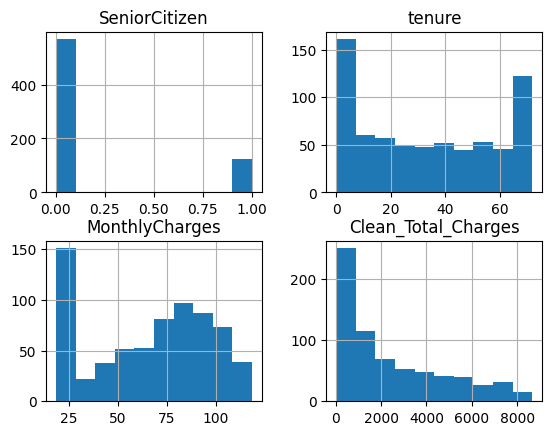

In [ ]:
pyspark_df.sample(False, 0.1).toPandas().hist();

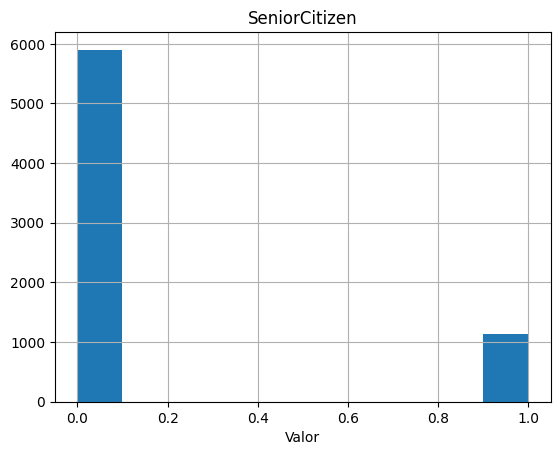

In [ ]:
pyspark_df.select('SeniorCitizen').toPandas().hist()

plt.xlabel("Valor")
plt.ylabel("Cuentas")

plt.show()

In [ ]:
pyspark_df.filter( F.col("SeniorCitizen") == 1 ).show(5)

+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+--------------+------------+-----+-------------------+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|MonthlyCharges|TotalCharges|Churn|Clean_Total_Charges|
+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+--------------+------------+-----+-------------------+
|8779-QRDMV|  Male|            1|     No|        No|     1|          No|No phone service|            DSL| 

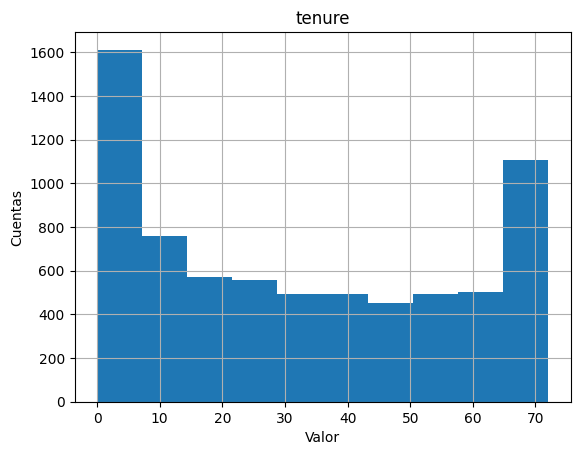

In [ ]:
pyspark_df.select('tenure').toPandas().hist()

plt.xlabel("Valor")
plt.ylabel("Cuentas")

plt.show()

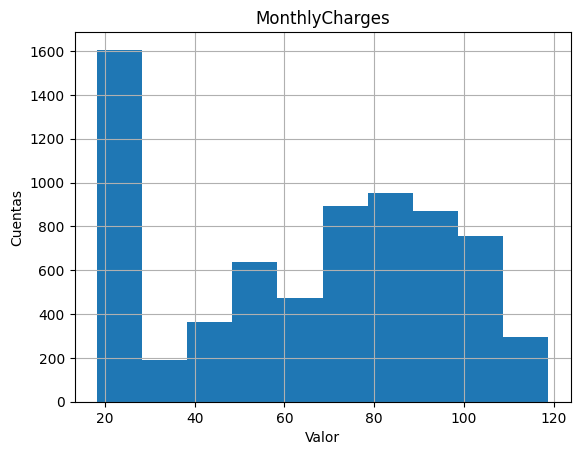

In [ ]:
pyspark_df.select('MonthlyCharges').toPandas().hist()

plt.xlabel("Valor")
plt.ylabel("Cuentas")

plt.show()

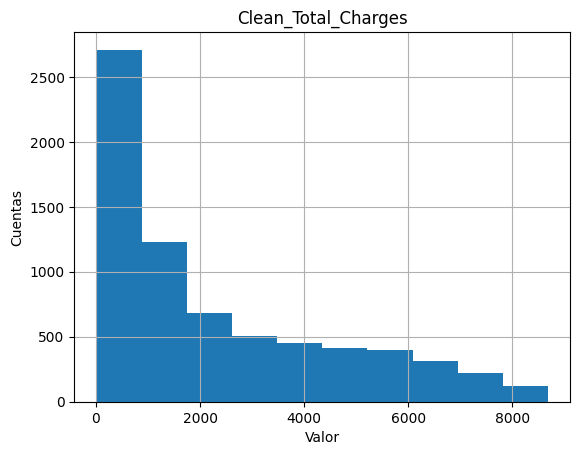

In [ ]:
pyspark_df.select('Clean_Total_Charges').toPandas().hist()

plt.xlabel("Valor")
plt.ylabel("Cuentas")

plt.show()

<Axes: >

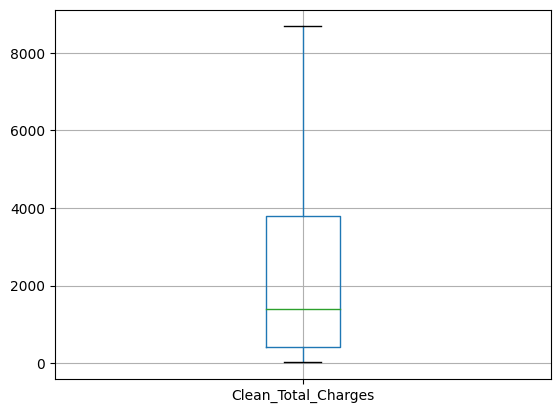

In [ ]:
pyspark_df.select('Clean_Total_Charges').toPandas().boxplot()

##Matriz de correlacion

In [16]:
V_numericas = ["SeniorCitizen", "tenure", "MonthlyCharges", "Clean_Total_Charges"]

In [ ]:
corr_df = pd.DataFrame()

for i in V_numericas:
  corr = []
  for j in V_numericas:
    corr.append( round( pyspark_df.stat.corr(i, j) , 2) )
  corr_df = pd.concat([corr_df, pd.Series(corr)], axis =1 )
corr_df.columns = V_numericas
corr_df.index = V_numericas

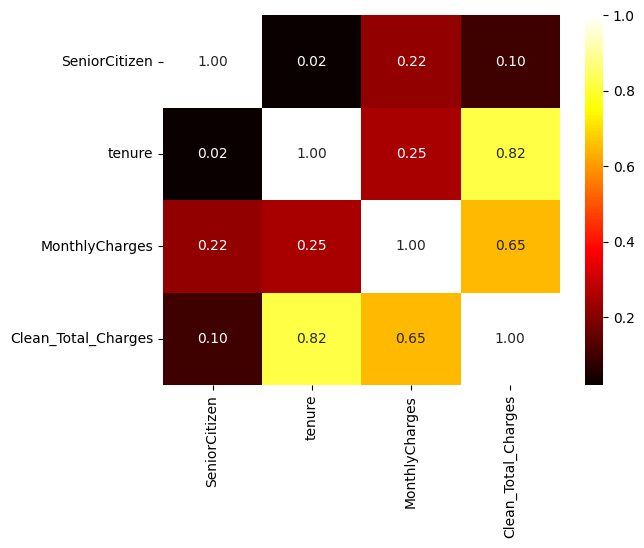

In [ ]:
sns.heatmap(corr_df, cmap="hot", annot= True, fmt=".2f")

plt.show()

#Consultas SQL

In [17]:
import pyspark.sql as sparksql

In [18]:
pyspark_df.createOrReplaceTempView('table')

#Transformación de variables

In [19]:
from pyspark.ml.feature import VectorAssembler, OneHotEncoder, StringIndexer

In [20]:
from pyspark.ml import Pipeline

##OneHot Variable objetivo

In [ ]:
pyspark_df.select("Churn").distinct().show()

+-----+
|Churn|
+-----+
|   No|
|  Yes|
+-----+



In [21]:
ChurnEncoder = StringIndexer( inputCol= "Churn", outputCol="y" )

In [22]:
converted_df = ChurnEncoder.fit(pyspark_df).transform(pyspark_df)

In [23]:
#encoder = OneHotEncoder(dropLast = True, inputCol =ChurnEncoder.getOutputCol(), outputCol="{0}_encoded".format(ChurnEncoder.getOutputCol() ) )

In [24]:
#converted_df = encoder.fit(converted_df).transform(converted_df)

In [ ]:
converted_df.show(5)

+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+--------------+------------+-----+-------------------+---+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|MonthlyCharges|TotalCharges|Churn|Clean_Total_Charges|  y|
+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+--------------+------------+-----+-------------------+---+
|7590-VHVEG|Female|            0|    Yes|        No|     1|          No|No phone service|     

##StandardScaler

In [25]:
from pyspark.ml.feature import StandardScaler

In [135]:
V_numericas[:]

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Clean_Total_Charges']

In [138]:
assembler = VectorAssembler(inputCols=["Clean_Total_Charges"], outputCol="features_num")

In [ ]:
V_numericas[1:]

['tenure', 'MonthlyCharges', 'Clean_Total_Charges']

In [139]:
assembled_df = assembler.transform(converted_df)

In [140]:
standardScaler = StandardScaler(inputCol="features_num", outputCol="features_scaled")

In [141]:
scaled_df = standardScaler.fit(assembled_df).transform(assembled_df)

##OneHot Encoding

In [142]:
indexers = [ StringIndexer( inputCol = col, outputCol="{0}_index".format(col) ) for col in V_categoricas[:-1] ]

In [144]:
encoders = [OneHotEncoder(dropLast = False, inputCol = indexer.getOutputCol(), outputCol="{0}_encoded". format(indexer.getOutputCol() ) )
for indexer in indexers]

In [145]:
scaled_df.show(5)

+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+--------------+------------+-----+-------------------+---+--------------------+--------------------+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|MonthlyCharges|TotalCharges|Churn|Clean_Total_Charges|  y|        features_num|     features_scaled|
+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+--------------+------------+-----+-------------------+---+-----------

In [146]:
input_columns = [encoder.getOutputCol() for encoder in encoders] + ["features_scaled"] + ["SeniorCitizen"]

In [147]:
assembler = VectorAssembler(inputCols=input_columns, outputCol = "feature")

###Pipeline

In [148]:
pipeline = Pipeline(stages = indexers+encoders+[assembler])

In [149]:
data_model = pipeline.fit(scaled_df)

In [234]:
nombres_features = [i.labels for i in data_model.stages[0:15] ]

In [272]:
nombres_features2 = []
kkk = 0
for i in nombres_features:
  nombre_V = V_categoricas[kkk]
  for j in i:
    nombres_features2.append(f"{nombre_V}_{j}")
  kkk += 1

In [275]:
nombres_caracteristicas = nombres_features2+["Clean_total_Charges"]+["SeniorCitizen"]

In [150]:
transformed_df = data_model.transform(scaled_df)

In [198]:
transformed_df.select("feature").collect()[0][0]

SparseVector(43, {1: 1.0, 3: 1.0, 4: 1.0, 7: 1.0, 10: 1.0, 12: 1.0, 14: 1.0, 18: 1.0, 20: 1.0, 23: 1.0, 26: 1.0, 29: 1.0, 32: 1.0, 35: 1.0, 37: 1.0, 41: 0.0132})

In [155]:
transformed_df1 = transformed_df.select("y", "feature")

In [156]:
transformed_df1.show(5)

+---+--------------------+
|  y|             feature|
+---+--------------------+
|0.0|(43,[1,3,4,7,10,1...|
|0.0|(43,[0,2,4,6,8,12...|
|1.0|(43,[0,2,4,6,8,12...|
|0.0|(43,[0,2,4,7,10,1...|
|1.0|(43,[1,2,4,6,8,11...|
+---+--------------------+
only showing top 5 rows



#Se crea conjunto de entrenamiento y prueba

In [157]:
train_data, test_data = transformed_df1.randomSplit( [0.8, 0.2], seed=42 )

In [158]:
train_data.show(5)

+---+--------------------+
|  y|             feature|
+---+--------------------+
|0.0|(43,[0,2,4,6,8,11...|
|0.0|(43,[0,2,4,6,8,11...|
|0.0|(43,[0,2,4,6,8,11...|
|0.0|(43,[0,2,4,6,8,11...|
|0.0|(43,[0,2,4,6,8,11...|
+---+--------------------+
only showing top 5 rows



In [159]:
train_data.groupby("y").count().show()

+---+-----+
|  y|count|
+---+-----+
|0.0| 4173|
|1.0| 1525|
+---+-----+



#Se crean los modelos

##LogisticRegression

In [160]:
from pyspark.ml.classification import LogisticRegression

In [161]:
lr1 = LogisticRegression(featuresCol="feature", labelCol="y")

In [162]:
lr1_model = lr1.fit(train_data)

In [163]:
predictions1 = lr1_model.transform(test_data)

In [ ]:
predictions1.columns

['y', 'feature', 'rawPrediction', 'probability', 'prediction']

In [ ]:
predictions1.show()

+---+--------------------+--------------------+--------------------+----------+
|  y|             feature|       rawPrediction|         probability|prediction|
+---+--------------------+--------------------+--------------------+----------+
|0.0|(44,[0,2,4,6,8,11...|[-0.9717161408300...|[0.27453857112491...|       1.0|
|0.0|(44,[0,2,4,6,8,11...|[-0.8679743664188...|[0.29567596895311...|       1.0|
|0.0|(44,[0,2,4,6,8,11...|[-0.7673239757400...|[0.31705826813431...|       1.0|
|0.0|(44,[0,2,4,6,8,11...|[-0.5158523523915...|[0.37382260276464...|       1.0|
|0.0|(44,[0,2,4,6,8,11...|[-0.4617051920081...|[0.38658138295697...|       1.0|
|0.0|(44,[0,2,4,6,8,11...|[-0.5340278543585...|[0.36957794591529...|       1.0|
|0.0|(44,[0,2,4,6,8,11...|[0.11999097860788...|[0.52996180451574...|       0.0|
|0.0|(44,[0,2,4,6,8,11...|[1.29153985423277...|[0.78440771144043...|       0.0|
|0.0|(44,[0,2,4,6,8,11...|[-1.0693901062472...|[0.25551908640138...|       1.0|
|0.0|(44,[0,2,4,6,8,11...|[-0.9587971219

##Evaluación del modelo

In [164]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [165]:
evaluator = BinaryClassificationEvaluator()

In [166]:
evaluator.setLabelCol("y")

BinaryClassificationEvaluator_fbede42bab2e

In [167]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [168]:
evaluator2 = MulticlassClassificationEvaluator(labelCol="y", predictionCol="prediction", metricName= "accuracy")

In [169]:
evaluator2.evaluate(predictions1)

0.7940520446096654

##RandomForestClassifier

In [170]:
from pyspark.ml.classification import RandomForestClassifier

In [171]:
lr2 = RandomForestClassifier(featuresCol="feature", labelCol="y", )#, rawPredictionCol= "raw",predictionCol= "prediction" )

In [172]:
lr2_model = lr2.fit(train_data)

In [173]:
predictions2 = lr2_model.transform(test_data)

In [ ]:
predictions2.show()

+---+--------------------+--------------------+--------------------+----------+
|  y|             feature|       rawPrediction|         probability|prediction|
+---+--------------------+--------------------+--------------------+----------+
|0.0|(44,[0,2,4,6,8,11...|[6.11564931116921...|[0.30578246555846...|       1.0|
|0.0|(44,[0,2,4,6,8,11...|[6.75644283516287...|[0.33782214175814...|       1.0|
|0.0|(44,[0,2,4,6,8,11...|[7.19616340355999...|[0.35980817017799...|       1.0|
|0.0|(44,[0,2,4,6,8,11...|[7.20983438311703...|[0.36049171915585...|       1.0|
|0.0|(44,[0,2,4,6,8,11...|[6.59063152415933...|[0.32953157620796...|       1.0|
|0.0|(44,[0,2,4,6,8,11...|[6.95107673154553...|[0.34755383657727...|       1.0|
|0.0|(44,[0,2,4,6,8,11...|[9.46020348493736...|[0.47301017424686...|       1.0|
|0.0|(44,[0,2,4,6,8,11...|[13.3535186604608...|[0.66767593302304...|       0.0|
|0.0|(44,[0,2,4,6,8,11...|[6.33742152520947...|[0.31687107626047...|       1.0|
|0.0|(44,[0,2,4,6,8,11...|[6.93842738957

###Evaluacion

In [174]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [175]:
evaluator = BinaryClassificationEvaluator()

In [176]:
evaluator.setLabelCol("y")

BinaryClassificationEvaluator_183043f0e8f2

In [ ]:
evaluator.getLabelCol()

'y'

In [177]:
evaluator.evaluate(predictions2)

0.8107139953070183

In [178]:
evaluator.getMetricName()

'areaUnderROC'

In [179]:
evaluator.evaluate(predictions2, {evaluator.metricName: "areaUnderPR"})

0.5729175718263634

In [180]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [181]:
evaluator2 = MulticlassClassificationEvaluator(labelCol="y", predictionCol="prediction", metricName= "accuracy")

In [182]:
evaluator2.setMetricName("accuracy")

MulticlassClassificationEvaluator_26f8de1b5b10

In [ ]:
evaluator2.getMetricName()

'accuracy'

In [ ]:
evaluator2.metricName

Param(parent='MulticlassClassificationEvaluator_2cbbf156e16d', name='metricName', doc='metric name in evaluation (f1|accuracy|weightedPrecision|weightedRecall|weightedTruePositiveRate| weightedFalsePositiveRate|weightedFMeasure|truePositiveRateByLabel| falsePositiveRateByLabel|precisionByLabel|recallByLabel|fMeasureByLabel| logLoss|hammingLoss)')

In [183]:
evaluator2.evaluate(predictions2)

0.7762081784386617

###Características más importantes

In [297]:
feature_importances = [round(i, 3) for i in lr2_model.featureImportances]

In [298]:
feature_importance_tuples = list(zip(nombres_caracteristicas, feature_importances))

In [299]:
sorted_feature_importance = sorted(feature_importance_tuples, key=lambda x: x[1], reverse=True)

10 características más importantes

In [301]:
sorted_feature_importance[0:10]

[('Contract_Month-to-month', 0.195),
 ('OnlineSecurity_No', 0.128),
 ('TechSupport_No', 0.114),
 ('Clean_total_Charges', 0.092),
 ('TechSupport_Yes', 0.061),
 ('InternetService_Fiber optic', 0.059),
 ('OnlineBackup_No', 0.051),
 ('OnlineSecurity_Yes', 0.038),
 ('DeviceProtection_No', 0.036),
 ('PaymentMethod_Electronic check', 0.036)]

10 características menos importantes

In [302]:
sorted_feature_importance[-10:]

[('Dependents_Yes', 0.0),
 ('PhoneService_Yes', 0.0),
 ('MultipleLines_No', 0.0),
 ('OnlineSecurity_No internet service', 0.0),
 ('DeviceProtection_Yes', 0.0),
 ('DeviceProtection_No internet service', 0.0),
 ('TechSupport_No internet service', 0.0),
 ('StreamingTV_No', 0.0),
 ('StreamingTV_Yes', 0.0),
 ('StreamingMovies_Yes', 0.0)]

###CrossValidator

In [ ]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [ ]:
param_grid = ParamGridBuilder().build()

In [ ]:
# Configurar la validación cruzada con 3 folds
cross_validator = CrossValidator(
    estimator=lr2,
    estimatorParamMaps=param_grid,
    evaluator=evaluator2,
    numFolds=6,
    seed=42
)

In [ ]:
# Entrenar el modelo con validación cruzada
cv_model = cross_validator.fit(train_data)

In [ ]:
# Hacer predicciones en el conjunto de prueba
predictionscv = cv_model.transform(test_data)

In [ ]:
cv_model.bestModel

RandomForestClassificationModel: uid=RandomForestClassifier_89d7357f08e9, numTrees=20, numClasses=2, numFeatures=44

In [ ]:
cv_model.avgMetrics

[0.7911206570368979]

In [ ]:
accuracy_on_test = evaluator2.evaluate(predictionscv)
print(f"Accuracy on test data: {accuracy_on_test}")

Accuracy on test data: 0.7836431226765799


###Confusion matrix

In [ ]:
predictionscv.show(5)

+---+--------------------+--------------------+--------------------+----------+
|  y|             feature|       rawPrediction|         probability|prediction|
+---+--------------------+--------------------+--------------------+----------+
|0.0|(44,[0,2,4,6,8,11...|[6.11564931116921...|[0.30578246555846...|       1.0|
|0.0|(44,[0,2,4,6,8,11...|[6.75644283516287...|[0.33782214175814...|       1.0|
|0.0|(44,[0,2,4,6,8,11...|[7.19616340355999...|[0.35980817017799...|       1.0|
|0.0|(44,[0,2,4,6,8,11...|[7.20983438311703...|[0.36049171915585...|       1.0|
|0.0|(44,[0,2,4,6,8,11...|[6.59063152415933...|[0.32953157620796...|       1.0|
+---+--------------------+--------------------+--------------------+----------+
only showing top 5 rows



In [ ]:
predictions2.show(5)

+---+--------------------+--------------------+--------------------+----------+
|  y|             feature|       rawPrediction|         probability|prediction|
+---+--------------------+--------------------+--------------------+----------+
|0.0|(44,[0,2,4,6,8,11...|[6.11564931116921...|[0.30578246555846...|       1.0|
|0.0|(44,[0,2,4,6,8,11...|[6.75644283516287...|[0.33782214175814...|       1.0|
|0.0|(44,[0,2,4,6,8,11...|[7.19616340355999...|[0.35980817017799...|       1.0|
|0.0|(44,[0,2,4,6,8,11...|[7.20983438311703...|[0.36049171915585...|       1.0|
|0.0|(44,[0,2,4,6,8,11...|[6.59063152415933...|[0.32953157620796...|       1.0|
+---+--------------------+--------------------+--------------------+----------+
only showing top 5 rows



In [ ]:
prediction_and_label = predictions2.select("prediction", "y").rdd.map(lambda row: (float(row["prediction"]), float(row["y"])))

In [ ]:
from pyspark.mllib.evaluation import MulticlassMetrics

In [ ]:
metrics10 = MulticlassMetrics(prediction_and_label)

In [ ]:
confusion_matrix = metrics10.confusionMatrix().toArray()

# Mostrar la matriz de confusión
print("Confusion Matrix:")
print(confusion_matrix)

Confusion Matrix:
[[929.  72.]
 [219. 125.]]


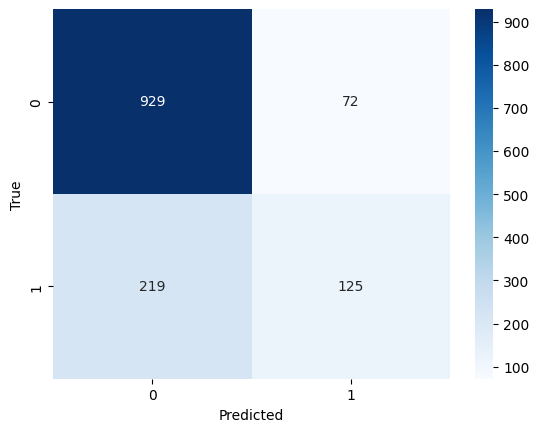

In [ ]:
confusion_matrix_df = sns.heatmap(confusion_matrix, annot=True, fmt=".0f", cmap="Blues", cbar=True)
confusion_matrix_df.set_xlabel("Predicted")
confusion_matrix_df.set_ylabel("True")
plt.show()

##XGBClassifier

In [ ]:
from xgboost.spark import SparkXGBClassifier

In [ ]:
xgb_clf = SparkXGBClassifier( features_col = "feature", label_col = "y")

In [ ]:
classifier_model = xgb_clf.fit(train_data)

INFO:XGBoost-PySpark:Running xgboost-2.0.2 on 1 workers with
	booster params: {'objective': 'binary:logistic', 'device': 'cpu', 'nthread': 1}
	train_call_kwargs_params: {'verbose_eval': True, 'num_boost_round': 100}
	dmatrix_kwargs: {'nthread': 1, 'missing': nan}
INFO:XGBoost-PySpark:Finished xgboost training!


In [ ]:
Predict_Data = classifier_model.transform(test_data)
Predict_Data.show()

+---+--------------------+--------------------+----------+--------------------+
|  y|             feature|       rawPrediction|prediction|         probability|
+---+--------------------+--------------------+----------+--------------------+
|0.0|(44,[0,2,4,6,8,11...|[-1.7060563564300...|       1.0|[0.15367591381072...|
|0.0|(44,[0,2,4,6,8,11...|[-0.1665168255567...|       1.0|[0.45846670866012...|
|0.0|(44,[0,2,4,6,8,11...|[0.81151133775711...|       0.0|[0.69243144989013...|
|0.0|(44,[0,2,4,6,8,11...|[0.49399530887603...|       0.0|[0.62104713916778...|
|0.0|(44,[0,2,4,6,8,11...|[-0.5289208292961...|       1.0|[0.37076860666275...|
|0.0|(44,[0,2,4,6,8,11...|[-0.3213997781276...|       1.0|[0.42033463716506...|
|0.0|(44,[0,2,4,6,8,11...|[0.79149353504180...|       0.0|[0.68815195560455...|
|0.0|(44,[0,2,4,6,8,11...|[2.21035933494567...|       0.0|[0.90117591619491...|
|0.0|(44,[0,2,4,6,8,11...|[-2.8853044509887...|       1.0|[0.05288475751876...|
|0.0|(44,[0,2,4,6,8,11...|[-2.4700138568

##Evaluación del modelo

In [ ]:
evaluator2.evaluate(Predict_Data)

0.79182156133829

In [ ]:
from pyspark.ml.tuning import CrossValidator

In [ ]:
cv = CrossValidator(estimator=xgb_clf, estimatorParamMaps=param_grid, evaluator=evaluator2,
        numFolds=6,
    seed=42)

In [ ]:
cvModel = cv.fit(train_data)

INFO:XGBoost-PySpark:Running xgboost-2.0.2 on 1 workers with
	booster params: {'device': 'cpu', 'objective': 'binary:logistic', 'nthread': 1}
	train_call_kwargs_params: {'verbose_eval': True, 'num_boost_round': 100}
	dmatrix_kwargs: {'nthread': 1, 'missing': nan}
INFO:XGBoost-PySpark:Finished xgboost training!
INFO:XGBoost-PySpark:Running xgboost-2.0.2 on 1 workers with
	booster params: {'device': 'cpu', 'objective': 'binary:logistic', 'nthread': 1}
	train_call_kwargs_params: {'verbose_eval': True, 'num_boost_round': 100}
	dmatrix_kwargs: {'nthread': 1, 'missing': nan}
INFO:XGBoost-PySpark:Finished xgboost training!
INFO:XGBoost-PySpark:Running xgboost-2.0.2 on 1 workers with
	booster params: {'device': 'cpu', 'objective': 'binary:logistic', 'nthread': 1}
	train_call_kwargs_params: {'verbose_eval': True, 'num_boost_round': 100}
	dmatrix_kwargs: {'nthread': 1, 'missing': nan}
INFO:XGBoost-PySpark:Finished xgboost training!
INFO:XGBoost-PySpark:Running xgboost-2.0.2 on 1 workers with
	bo

In [ ]:
cvModel.avgMetrics

[0.7774703363962151]